In [35]:
import pandas as pd
import numpy as np


In [36]:
df = pd.read_csv('Mental_Health_and_Social_Media_Balance_Dataset.csv')
df

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0
...,...,...,...,...,...,...,...,...,...,...
495,U496,23,Male,6.9,5.0,7.0,4.0,2.0,X (Twitter),10.0
496,U497,43,Female,5.6,7.0,6.0,5.0,2.0,Facebook,9.0
497,U498,41,Male,7.7,5.0,7.0,2.0,2.0,LinkedIn,8.0
498,U499,23,Male,4.2,9.0,7.0,0.0,2.0,Facebook,9.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


In [38]:
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
df.describe()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


In [41]:
df['Gender'].unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



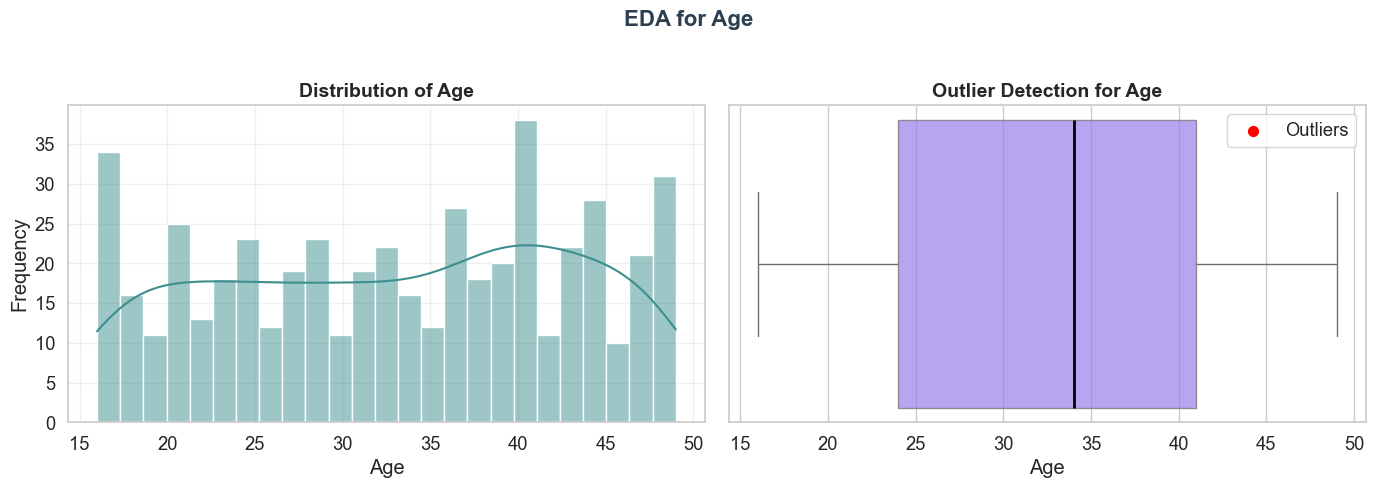

 Age: number of outliers = 0


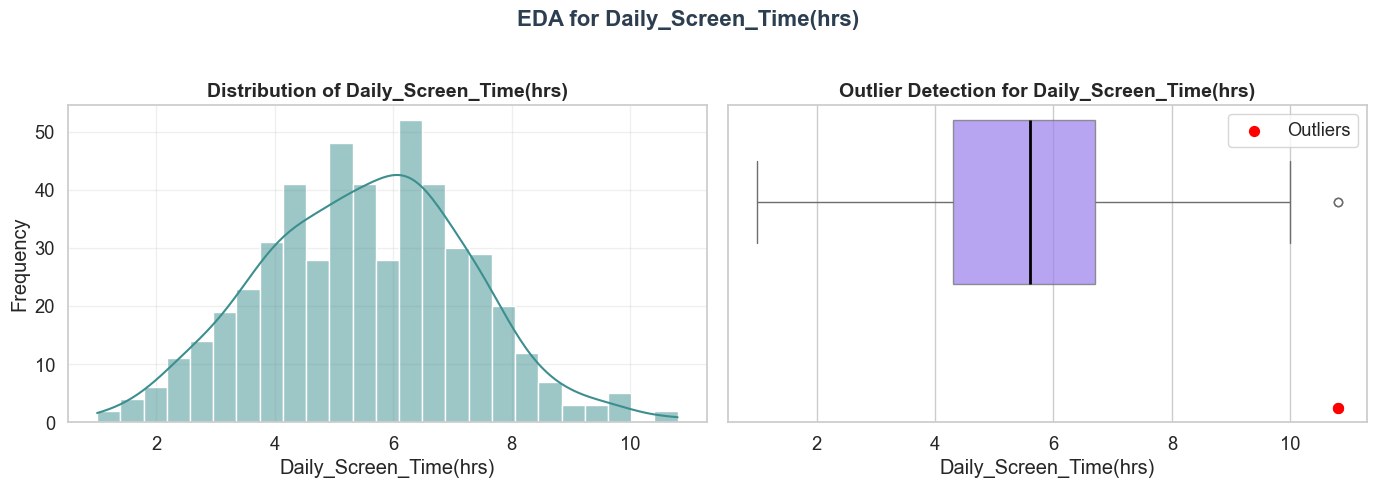

 Daily_Screen_Time(hrs): number of outliers = 2


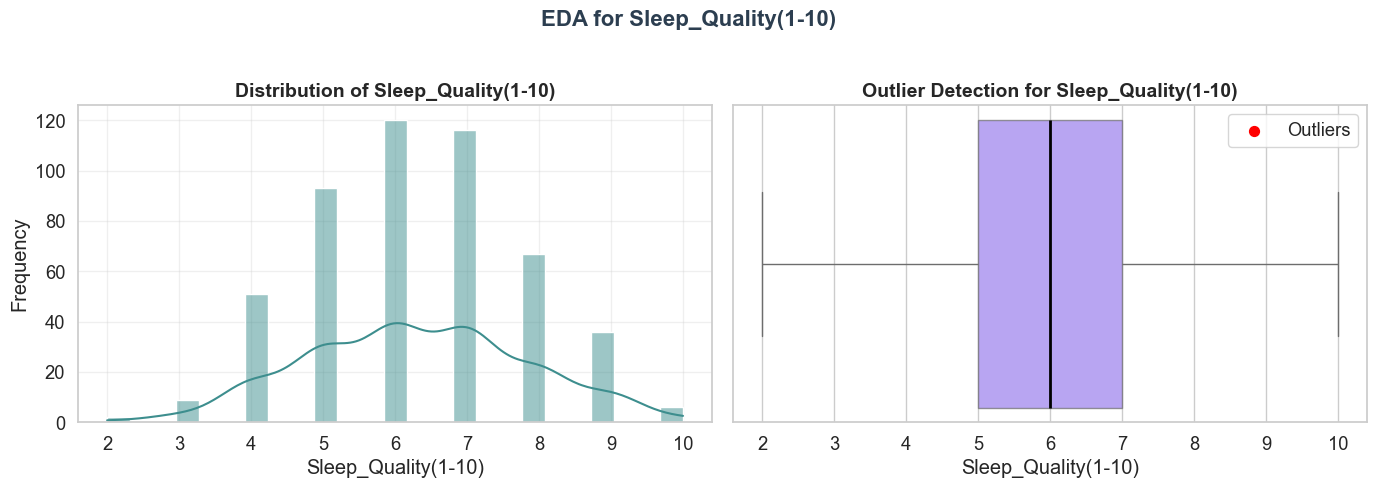

 Sleep_Quality(1-10): number of outliers = 0


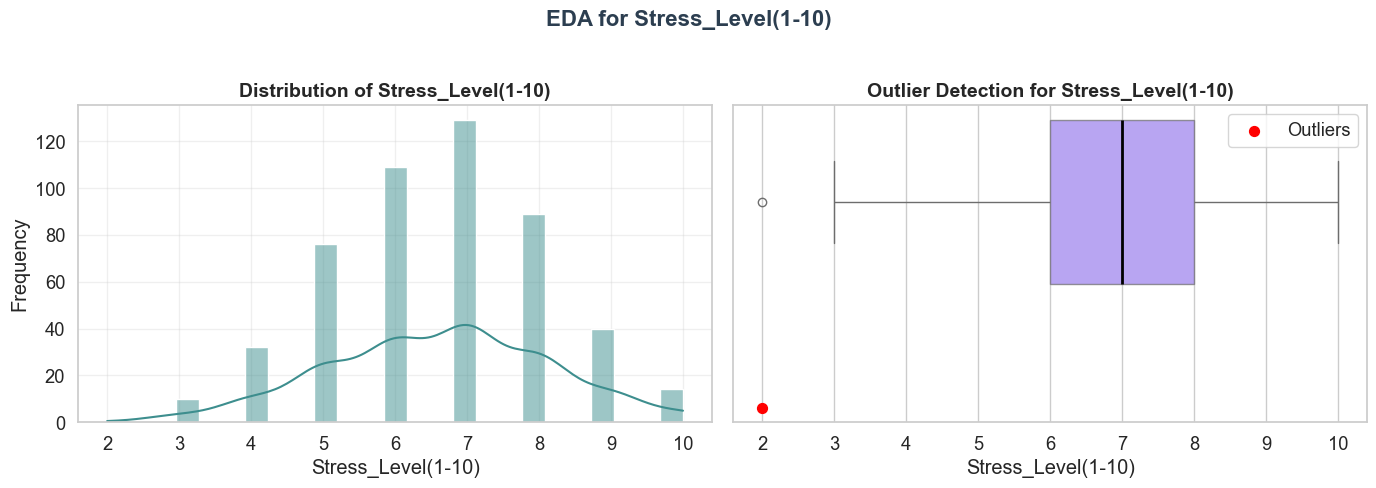

 Stress_Level(1-10): number of outliers = 1


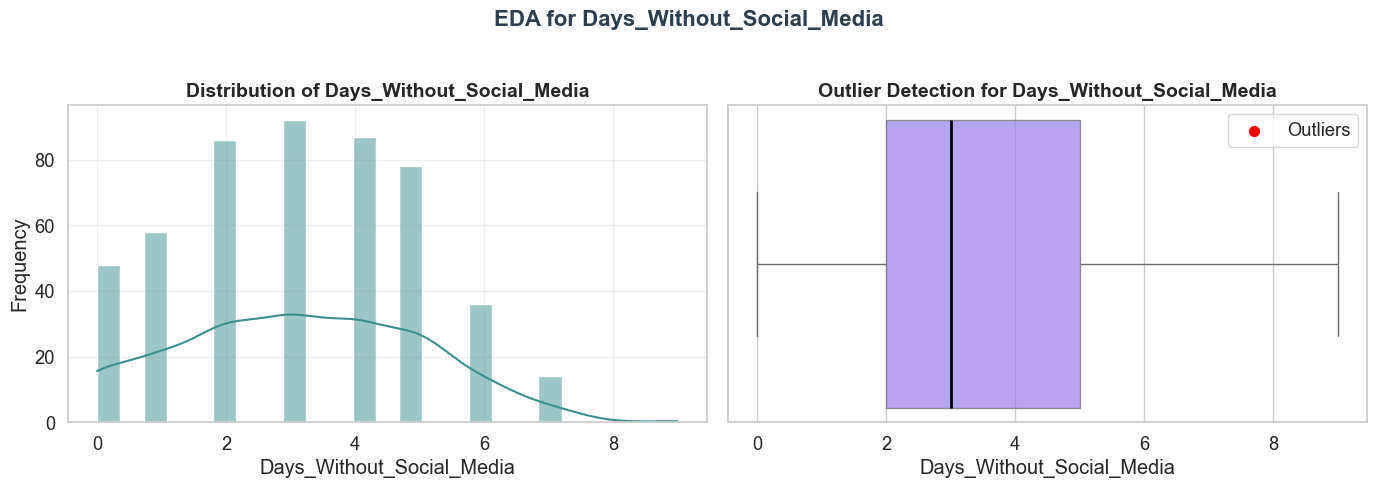

 Days_Without_Social_Media: number of outliers = 0


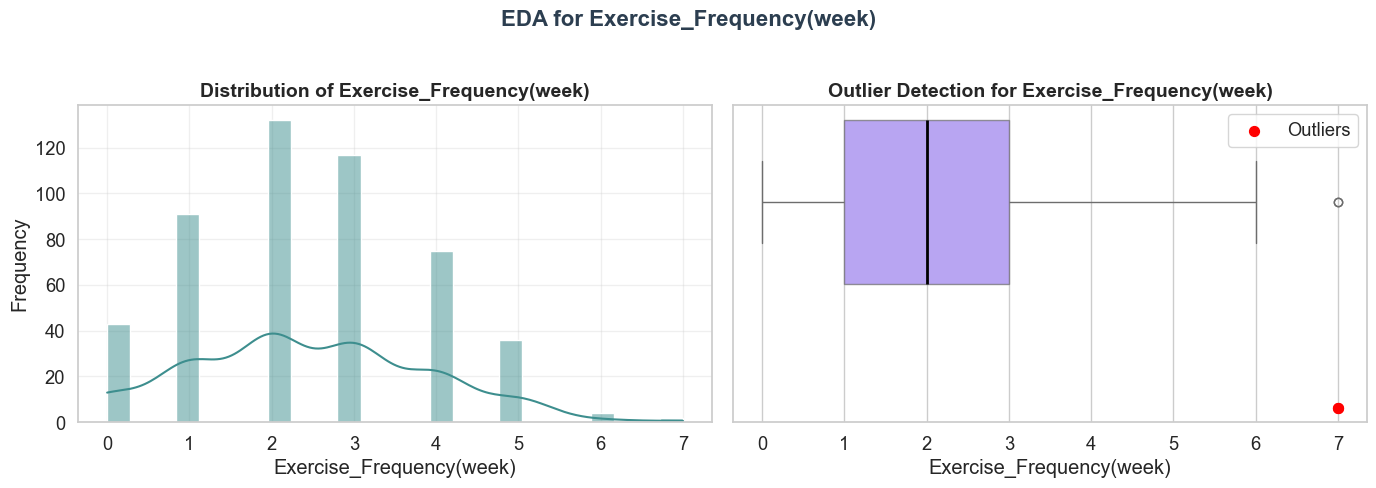

 Exercise_Frequency(week): number of outliers = 2


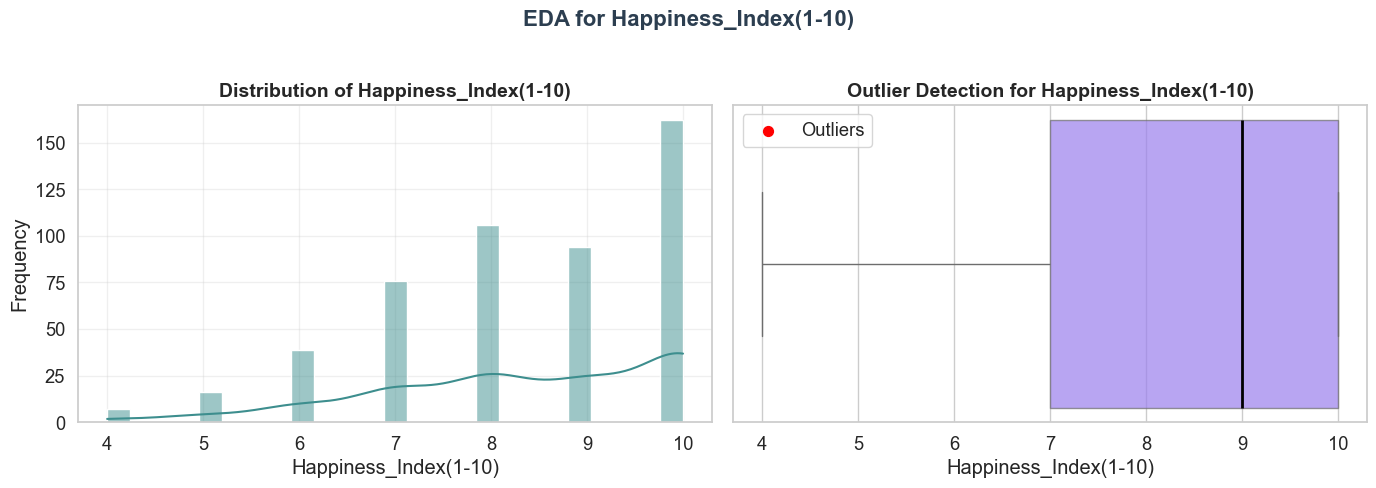

 Happiness_Index(1-10): number of outliers = 0


In [43]:
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = (9, 5)

numeric_cols=df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    fig, ax=plt.subplots(1, 2, figsize=(14, 5))
    
    cmap=sns.color_palette("coolwarm", as_cmap=True)
    sns.histplot(df[col], kde=True, bins=25, color=sns.color_palette("crest", 8)[3], ax=ax[0])
    ax[0].set_title(f"Distribution of {col}", fontsize=14, fontweight="bold")
    ax[0].set_xlabel(col)
    ax[0].set_ylabel("Frequency")
    ax[0].grid(alpha=0.3)
    
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3 - Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    outliers=df[(df[col]<lower) | (df[col]>upper)]
    
    sns.boxplot(
        x=df[col],
        ax=ax[1],
        color=sns.color_palette("cool")[3],
        boxprops=dict(alpha=0.7),
        medianprops=dict(color="black", linewidth=2),
    )
    
    ax[1].scatter(outliers[col], np.ones(outliers.shape[0]), color="red", s=50, label="Outliers")
    ax[1].set_title(f"Outlier Detection for {col}", fontsize=14, fontweight="bold")
    ax[1].set_xlabel(col)
    ax[1].legend()
    
    plt.suptitle(f"EDA for {col}", fontsize=16, fontweight="bold", color="#2C3E50")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    print(f" {col}: number of outliers = {outliers.shape[0]}")



C:\Users\elsarof\AppData\Local\Temp\ipykernel_8736\4074072472.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\elsarof\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\elsarof\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

22.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\elsarof\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

14.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\elsarof\AppData\Local\Programs\Python\Python310\lib\site-packages

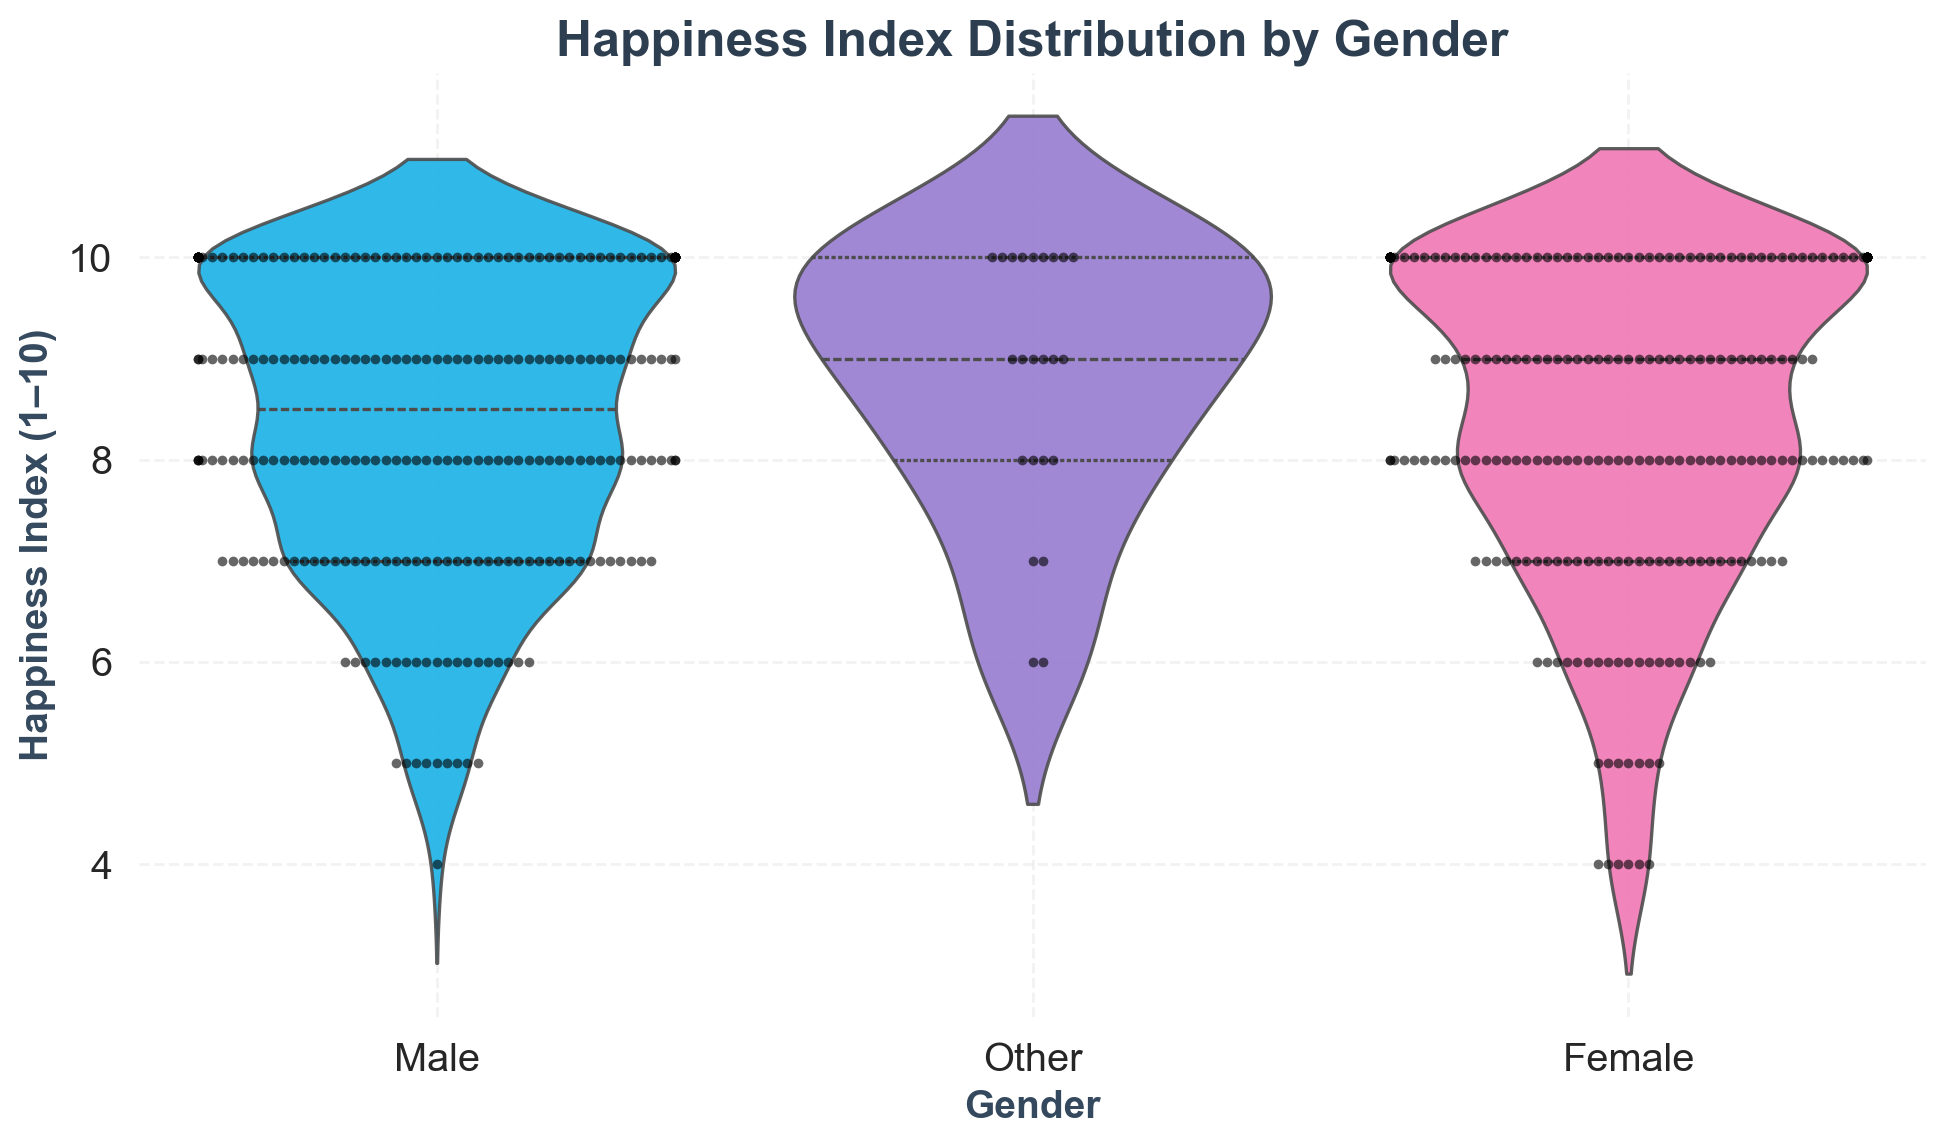

In [44]:
sns.set_theme(style="whitegrid", font_scale=1.3)

plt.figure(figsize=(10, 6), dpi=200)

palette = {
    "Male": "#00BFFF",     
    "Female": "#FF69B4",   
    "Other": "#9370DB"     
}

sns.violinplot(
    x="Gender",
    y="Happiness_Index(1-10)",
    data=df,
    palette=palette,
    inner="quartile",       
    linewidth=1.2,
    saturation=0.8,
    alpha=0.9
)

sns.swarmplot(
    x="Gender",
    y="Happiness_Index(1-10)",
    data=df,
    color="black",
    alpha=0.6,
    size=3.5
)

plt.title("Happiness Index Distribution by Gender", fontsize=18, fontweight="bold", color="#2C3E50")
plt.xlabel("Gender", fontsize=14, fontweight="bold", color="#34495E")
plt.ylabel("Happiness Index (1–10)", fontsize=14, fontweight="bold", color="#34495E")

sns.despine(left=True, bottom=True)
plt.grid(alpha=0.25, linestyle="--")
plt.tight_layout()

plt.show()


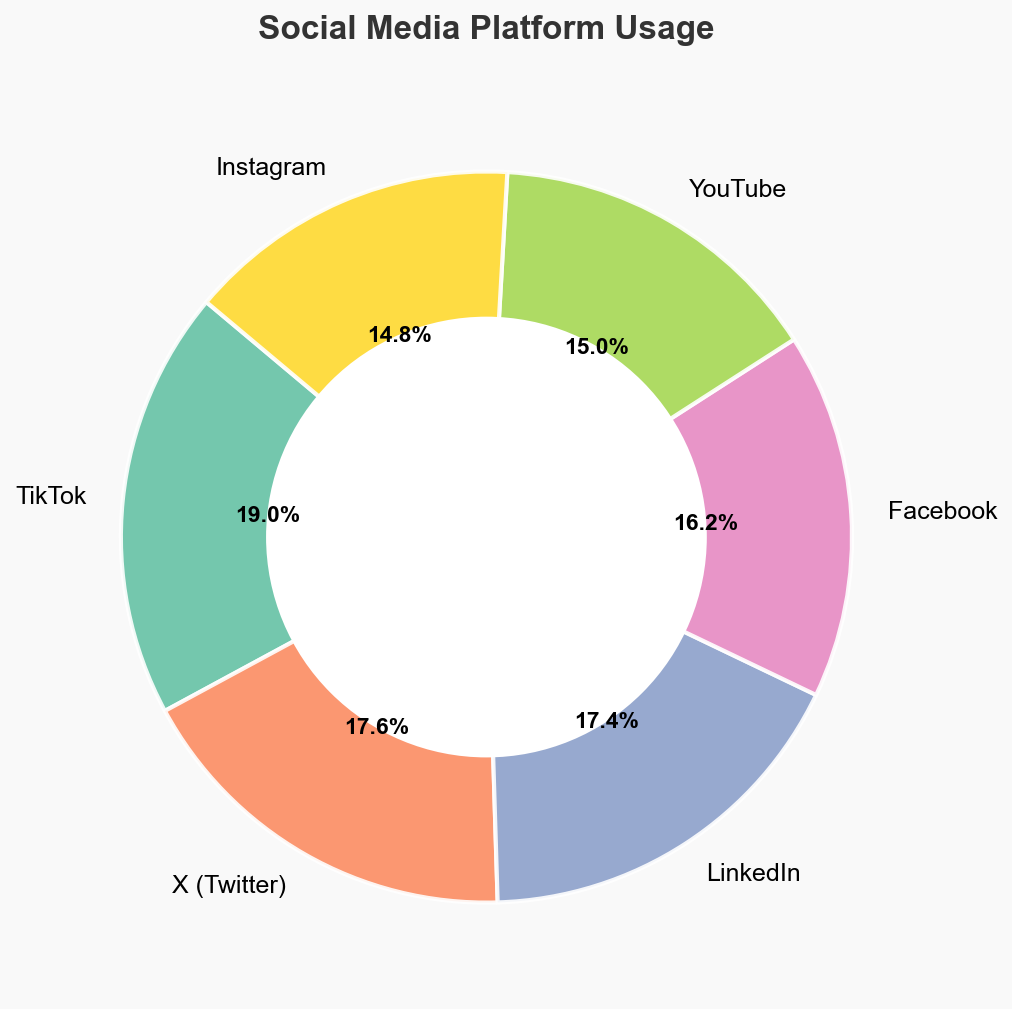

In [45]:

platform_counts = df["Social_Media_Platform"].value_counts()

colors = sns.color_palette("Set2", len(platform_counts))

plt.figure(figsize=(9, 7), dpi=150)

wedges, texts, autotexts = plt.pie(
    platform_counts,
    labels=platform_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    wedgeprops={"edgecolor": "white", "linewidth": 2, "antialiased": True, "alpha": 0.9},
    textprops={"fontsize": 12, "color": "black"}
)

for autotext in autotexts:
    autotext.set_color("black")
    autotext.set_fontsize(11)
    autotext.set_weight("bold")

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Social Media Platform Usage", fontsize=16, fontweight='bold', color="#333333", pad=20)

plt.gca().set_facecolor("#f9f9f9")
fig.patch.set_facecolor("#f9f9f9")

plt.tight_layout()
plt.show()


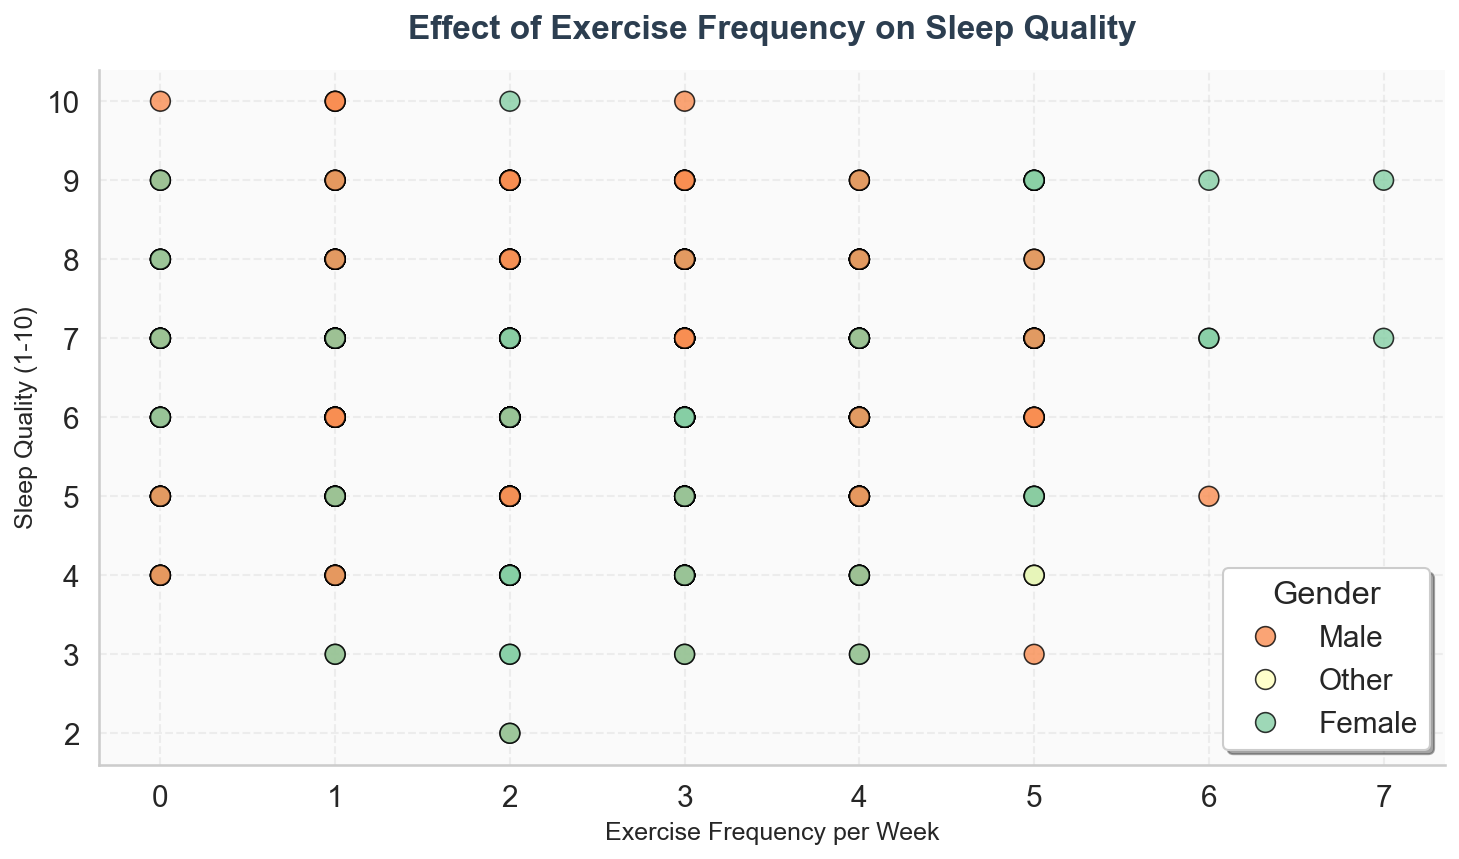

In [46]:


plt.figure(figsize=(10, 6), dpi=150)

sns.scatterplot(
    data=df,
    x="Exercise_Frequency(week)",
    y="Sleep_Quality(1-10)",
    hue="Gender",                     
    palette="Spectral",               
    s=90,                             
    alpha=0.8,                        
    edgecolor="black"                
)

plt.title("Effect of Exercise Frequency on Sleep Quality", fontsize=16, fontweight="bold", color="#2C3E50", pad=15)
plt.xlabel("Exercise Frequency per Week", fontsize=12)
plt.ylabel("Sleep Quality (1-10)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.3)
sns.despine()
plt.gca().set_facecolor("#fafafa")

plt.legend(title="Gender", loc="best", frameon=True, shadow=True)
plt.tight_layout()
plt.show()


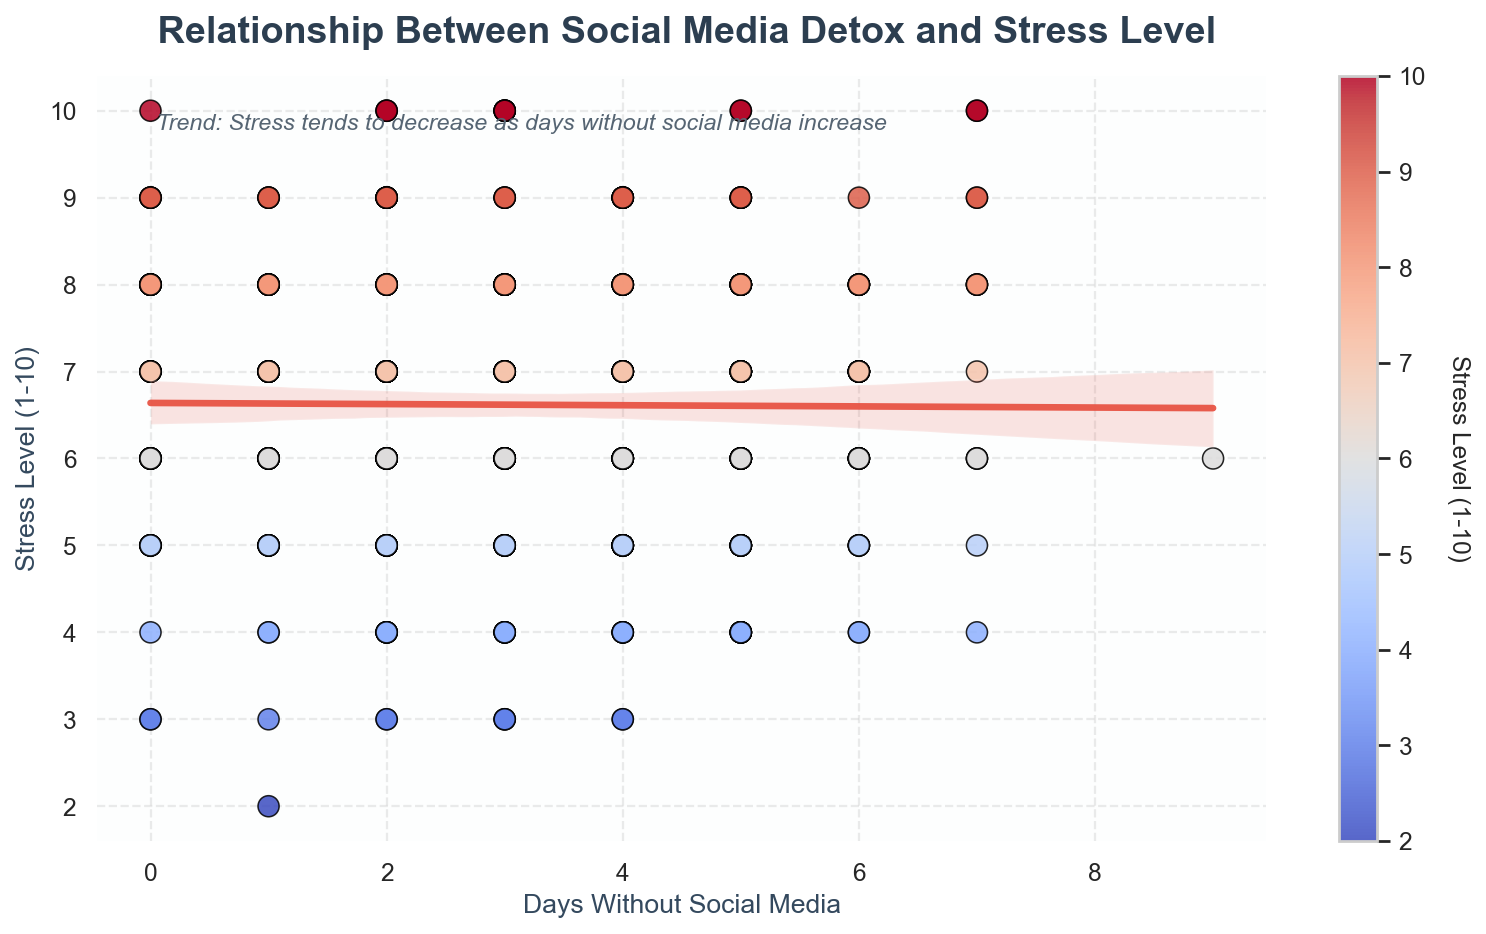

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6), dpi=160)
sns.set(style="whitegrid")

palette = sns.color_palette("coolwarm", as_cmap=True)

points = plt.scatter(
    df["Days_Without_Social_Media"],
    df["Stress_Level(1-10)"],
    c=df["Stress_Level(1-10)"],
    cmap=palette,
    s=90,
    alpha=0.85,
    edgecolor="black",
    linewidth=0.7
)

sns.regplot(
    x="Days_Without_Social_Media",
    y="Stress_Level(1-10)",
    data=df,
    scatter=False,
    color="#E74C3C",
    line_kws={"linewidth": 3, "alpha": 0.9}
)

cbar = plt.colorbar(points)
cbar.set_label("Stress Level (1-10)", rotation=270, labelpad=20, fontsize=11)

plt.title(" Relationship Between Social Media Detox and Stress Level", 
          fontsize=17, fontweight="bold", color="#2C3E50", pad=15)
plt.xlabel("Days Without Social Media", fontsize=12, color="#34495E")
plt.ylabel("Stress Level (1-10)", fontsize=12, color="#34495E")

plt.grid(True, linestyle="--", alpha=0.4)
sns.despine(left=True, bottom=True)
plt.gca().set_facecolor("#FDFEFE")

plt.text(
    0.05, 0.93, 
    "Trend: Stress tends to decrease as days without social media increase ",
    transform=plt.gca().transAxes,
    fontsize=10.5, 
    color="#566573", 
    style="italic"
)

plt.tight_layout()
plt.show()


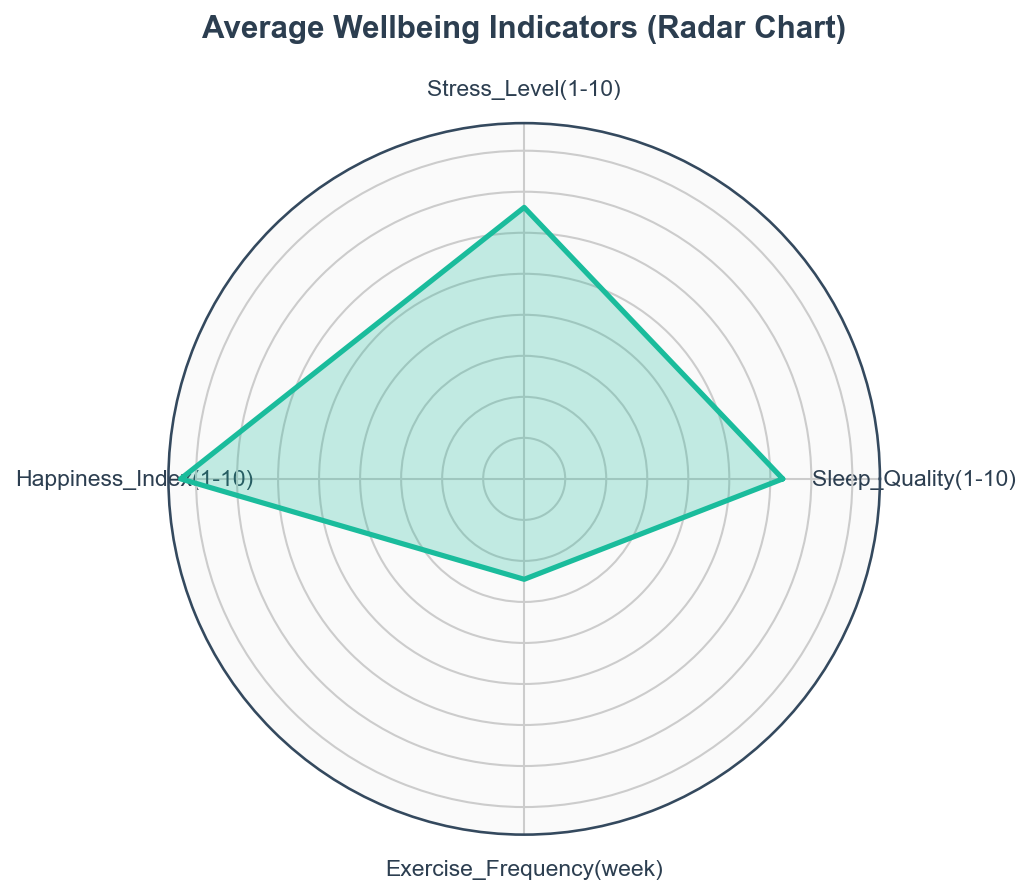

In [48]:
from math import pi

cols = ["Sleep_Quality(1-10)", "Stress_Level(1-10)", "Happiness_Index(1-10)", "Exercise_Frequency(week)"]
values = df[cols].mean().tolist()

angles = np.linspace(0, 2 * np.pi, len(cols), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

plt.figure(figsize=(7, 7), dpi=150)
ax = plt.subplot(111, polar=True)

ax.plot(angles, values, color="#1ABC9C", linewidth=2.5, linestyle='solid')
ax.fill(angles, values, color="#1ABC9C", alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(cols, fontsize=11, color="#2C3E50")
ax.set_yticklabels([])
ax.set_rlabel_position(30)
plt.title("Average Wellbeing Indicators (Radar Chart)", fontsize=15, fontweight="bold", color="#2C3E50", pad=20)

ax.spines["polar"].set_color("#34495E")
ax.set_facecolor("#FAFAFA")
plt.tight_layout()
plt.show()


C:\Users\elsarof\AppData\Local\Temp\ipykernel_8736\1487151430.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



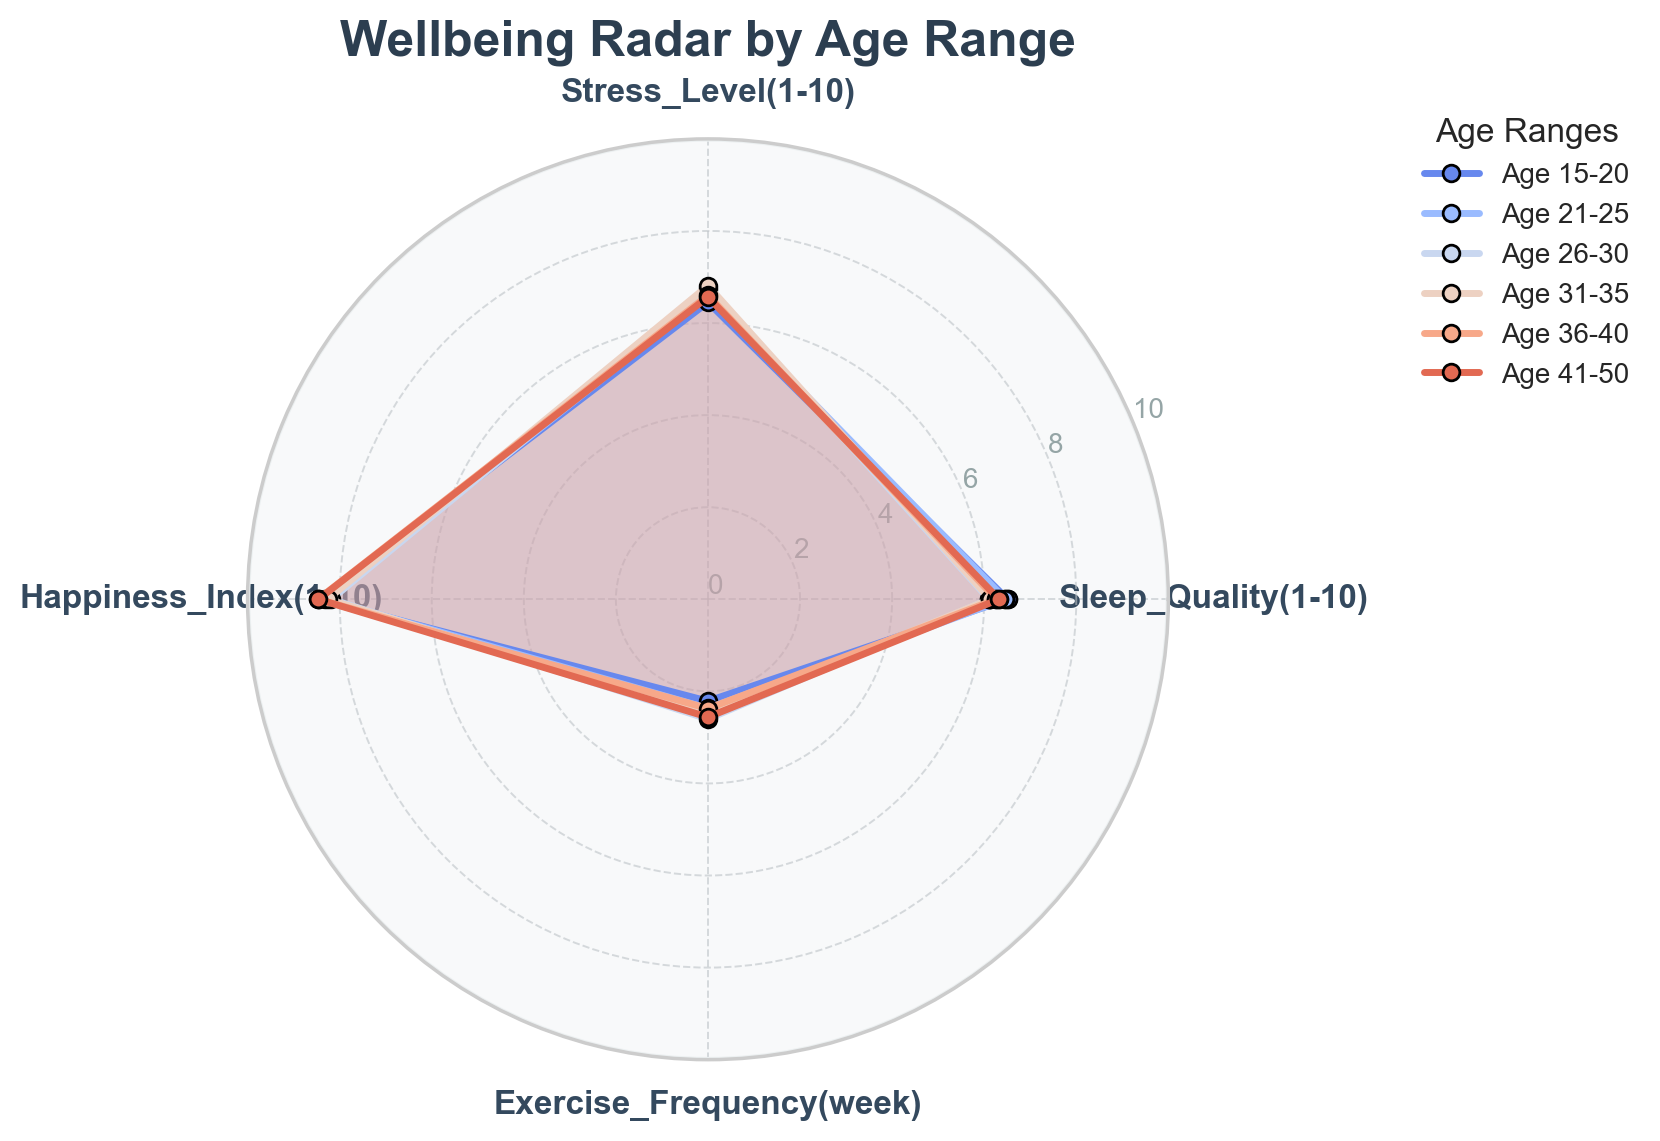

In [49]:

cols = ["Sleep_Quality(1-10)", "Stress_Level(1-10)", "Happiness_Index(1-10)", "Exercise_Frequency(week)"]


bins = [10, 20, 25, 30, 35, 40, 50, 100]
labels = ["15-20", "21-25", "26-30", "31-35", "36-40", "41-50", "50+"]

df["Age_Range"] = pd.cut(df["Age"], bins=bins, labels=labels, include_lowest=True)

age_groups = df.groupby("Age_Range")[cols].mean().dropna()

angles = np.linspace(0, 2 * np.pi, len(cols), endpoint=False).tolist()
angles += angles[:1]

colors = sns.color_palette("coolwarm", n_colors=len(age_groups))

plt.figure(figsize=(9, 9), dpi=200)
fig = plt.subplot(polar=True)
fig.set_facecolor("#F8F9FA")
plt.title(
    "Wellbeing Radar by Age Range",
    fontsize=18,
    fontweight="bold",
    color="#2C3E50",
    pad=30
)

for (age_range, row), color in zip(age_groups.iterrows(), colors):
    values = row.tolist()
    values += values[:1]
    fig.plot(
        angles, values,
        color=color,
        linewidth=2.5,
        linestyle="-",
        label=f"Age {age_range}",
        marker="o",
        markersize=6,
        markerfacecolor=color,
        markeredgecolor="black"
    )
    fig.fill(angles, values, color=color, alpha=0.15)

plt.xticks(angles[:-1], cols, fontsize=12, fontweight="bold", color="#34495E")
plt.yticks(
    np.arange(0, 11, 2),
    [str(i) for i in range(0, 11, 2)],
    color="#95A5A6",
    fontsize=10
)
plt.ylim(0, 10)
plt.grid(color="#BDC3C7", linestyle="--", linewidth=0.7, alpha=0.6)

circle = plt.Circle((0, 0), 10, transform=fig.transData._b, color="#ECF0F1", fill=False, lw=2)
fig.add_artist(circle)

fig.patch.set_alpha(0.95)

plt.legend(
    bbox_to_anchor=(1.25, 1.05),
    loc="upper left",
    title="Age Ranges",
    fontsize=10,
    title_fontsize=12,
    frameon=False
)

plt.tight_layout()
plt.show()


C:\Users\elsarof\AppData\Local\Temp\ipykernel_8736\984599391.py:23: UserWarning:

Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) Arial.

C:\Users\elsarof\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) Arial.



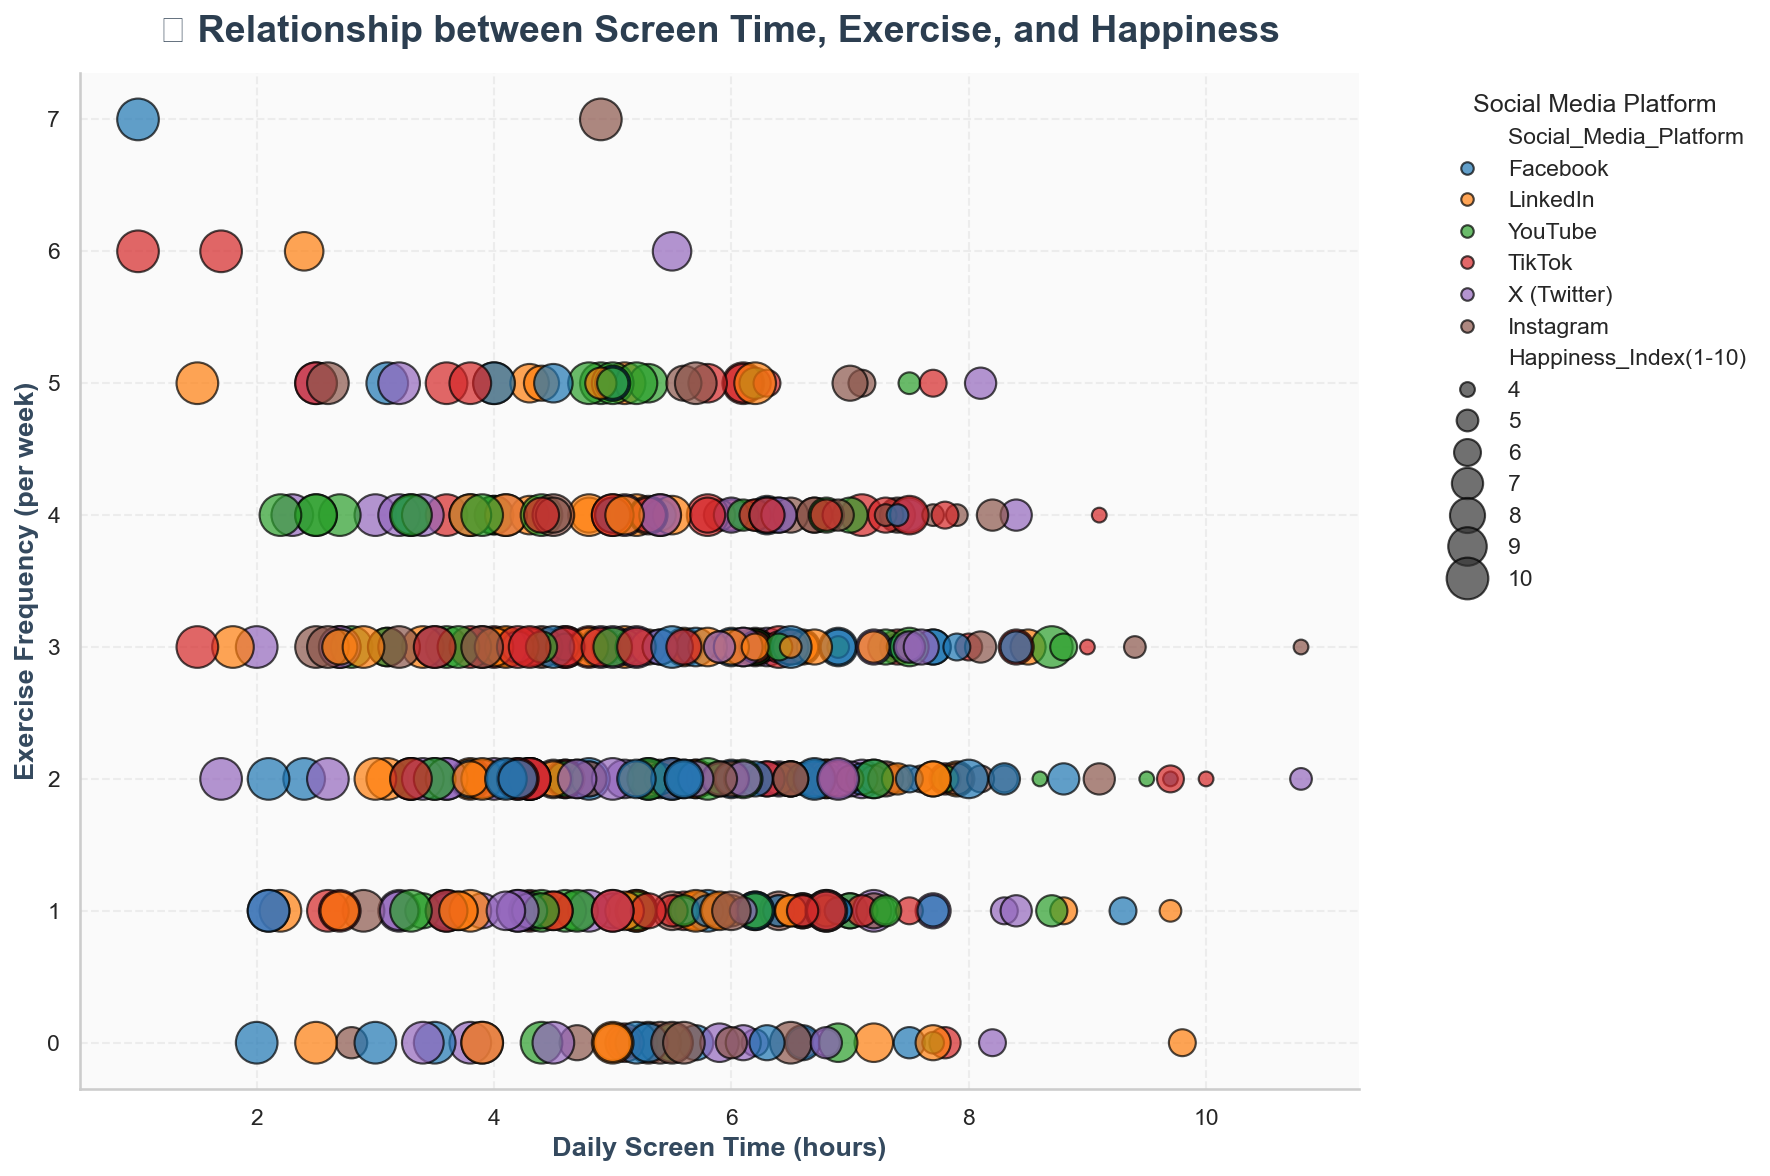

In [50]:
plt.figure(figsize=(12, 8), dpi=150)

sns.scatterplot(
    data=df,
    x="Daily_Screen_Time(hrs)",   
    y="Exercise_Frequency(week)",
    size="Happiness_Index(1-10)",
    hue="Social_Media_Platform",
    sizes=(50, 400),
    alpha=0.7,
    palette="tab10",
    edgecolor="black"
)

plt.title("💪 Relationship between Screen Time, Exercise, and Happiness", fontsize=18, fontweight="bold", color="#2C3E50", pad=15)
plt.xlabel("Daily Screen Time (hours)", fontsize=13, fontweight="bold", color="#34495E")
plt.ylabel("Exercise Frequency (per week)", fontsize=13, fontweight="bold", color="#34495E")

plt.grid(True, linestyle="--", alpha=0.3)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Social Media Platform", frameon=False)
plt.gca().set_facecolor("#FAFAFA")
plt.tight_layout()
plt.show()


In [51]:
import plotly.express as px

hierarchy_data = df.groupby(['Social_Media_Platform', 'Gender', 'Age_Range']).size().reset_index(name='count')

fig = px.sunburst(
    hierarchy_data,
    path=['Social_Media_Platform', 'Gender', 'Age_Range'],
    values='count',
    title='Social Media Platform Usage Hierarchy',
    width=800,
    height=800
)

fig.update_layout(
    title_x=0.5,
    title_font_size=20
)
fig.show()

C:\Users\elsarof\AppData\Local\Temp\ipykernel_8736\804424659.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\elsarof\AppData\Local\Temp\ipykernel_8736\1556838466.py:21: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



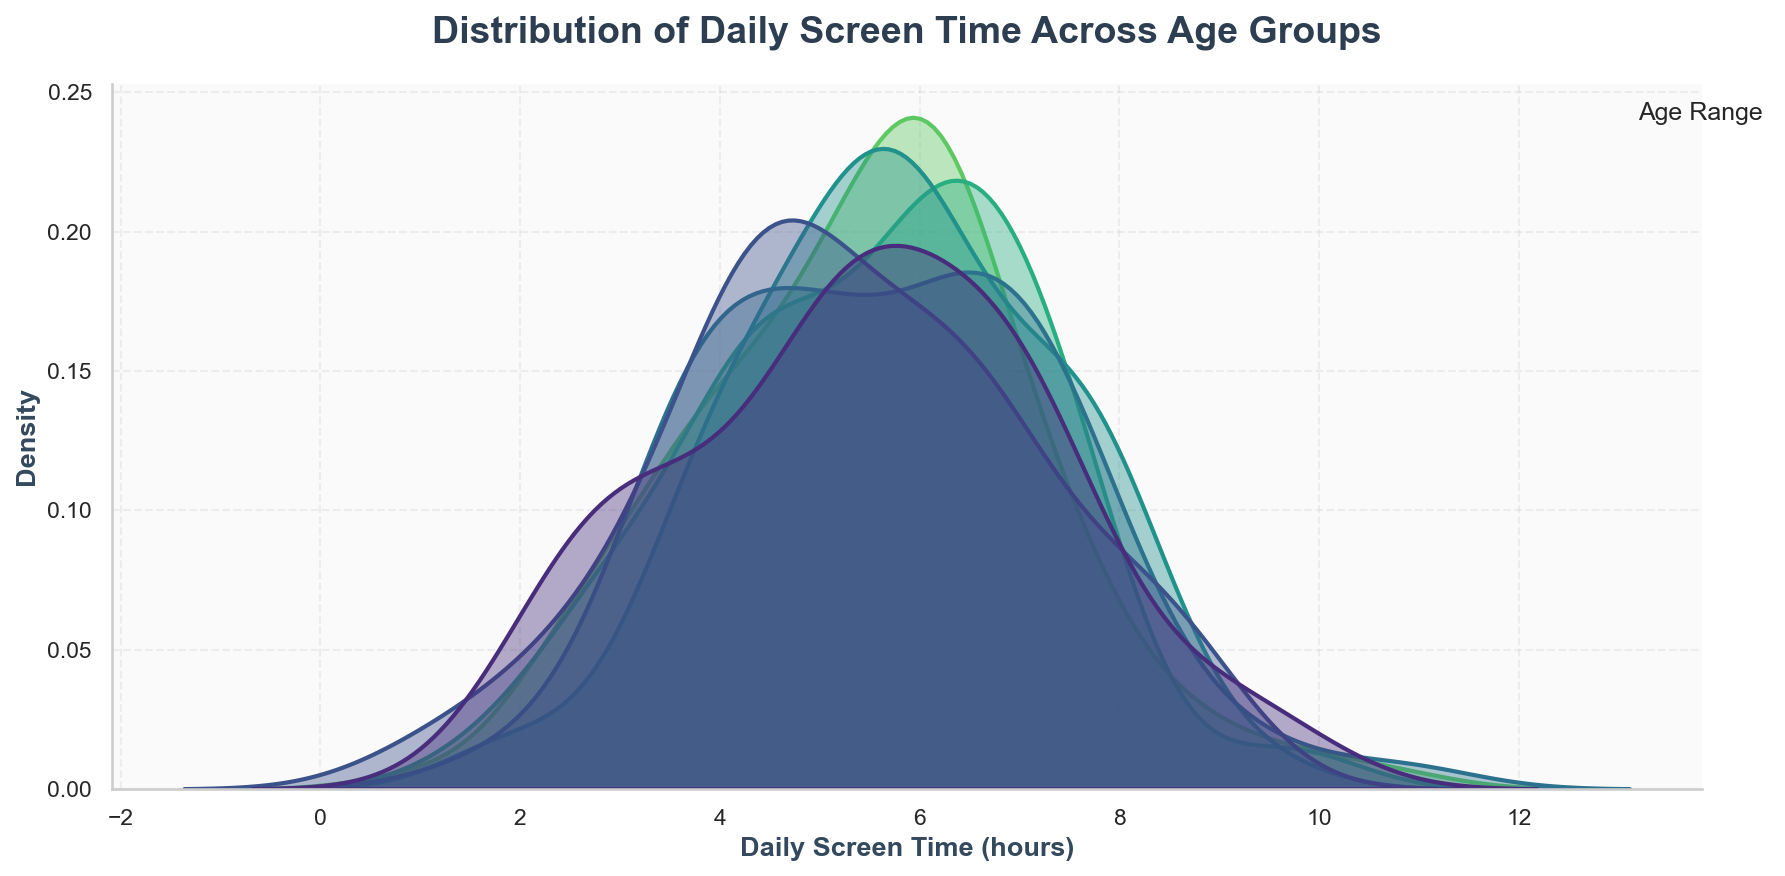

In [52]:
plt.figure(figsize=(12, 6), dpi=150)

sns.kdeplot(
    data=df,
    x="Daily_Screen_Time(hrs)", 
    hue="Age_Range",
    fill=True,
    common_norm=False,
    alpha=0.4,
    linewidth=2,
    palette="viridis"
)

plt.title("Distribution of Daily Screen Time Across Age Groups", fontsize=18, fontweight="bold", color="#2C3E50", pad=20)
plt.xlabel("Daily Screen Time (hours)", fontsize=13, fontweight="bold", color="#34495E")
plt.ylabel("Density", fontsize=13, fontweight="bold", color="#34495E")

plt.grid(True, linestyle="--", alpha=0.3)
sns.despine()

plt.legend(title="Age Range", bbox_to_anchor=(1.05, 1), frameon=False, fontsize=10, title_fontsize=12)
plt.gca().set_facecolor("#FAFAFA")
plt.tight_layout()
plt.show()


C:\Users\elsarof\AppData\Local\Temp\ipykernel_8736\2498576895.py:18: UserWarning:

Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.

C:\Users\elsarof\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.



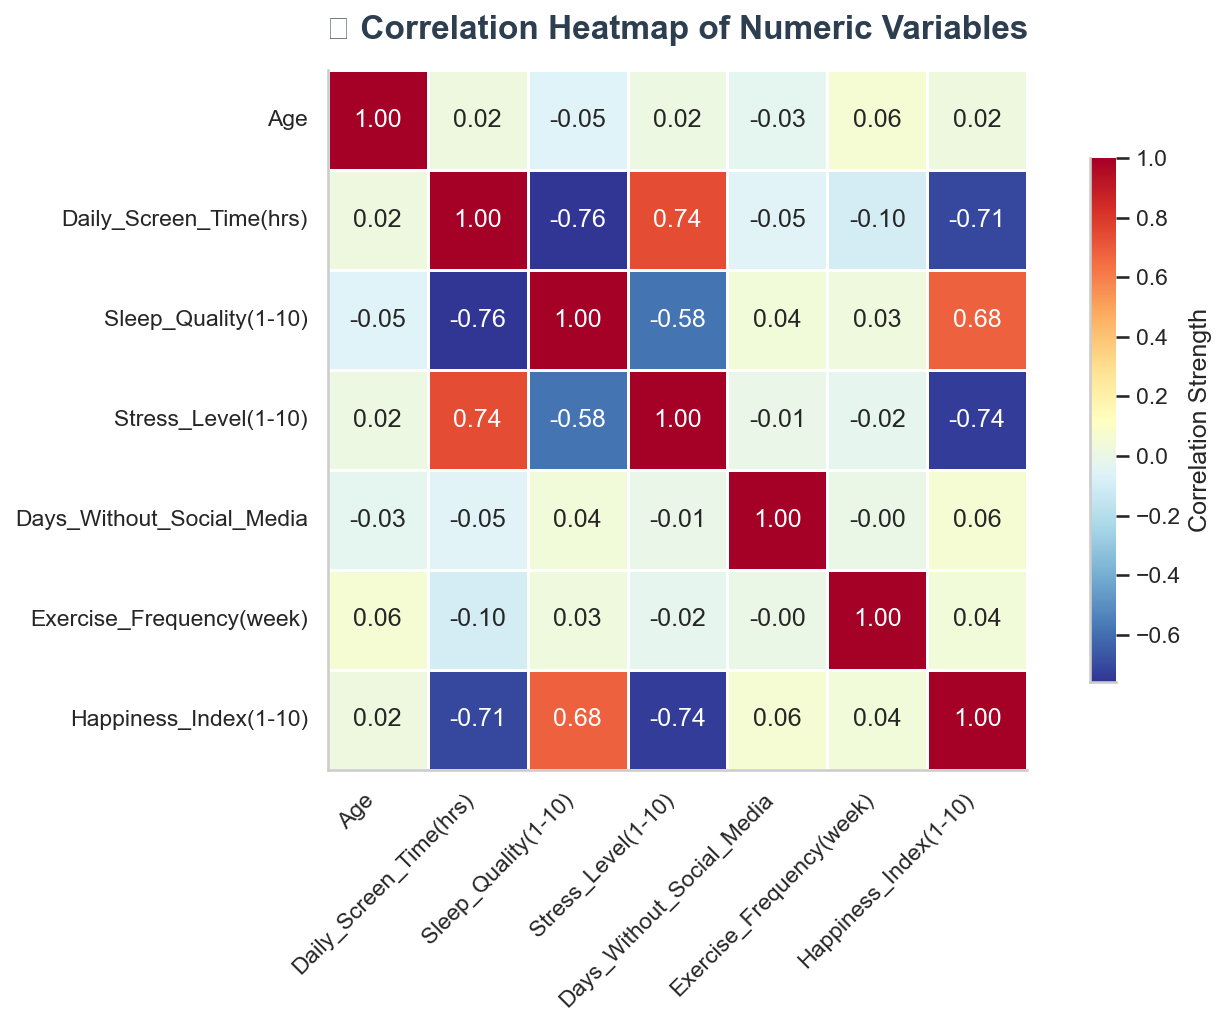

In [53]:
plt.figure(figsize=(10, 7), dpi=150)
corr = df[numeric_cols].corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="RdYlBu_r",
    linewidths=0.6,
    square=True,
    cbar_kws={"shrink": .75, "label": "Correlation Strength"}
)

plt.title("🔹 Correlation Heatmap of Numeric Variables", fontsize=16, fontweight="bold", color="#2C3E50", pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# -------------------
# 🗂 تحميل البيانات
# -------------------
st.title("📊 Mental Health & Social Media Dashboard")
st.markdown("Explore user wellbeing, screen time, and social media usage interactively!")

# تحميل ملف CSV أو استخدام df الموجود
# df = pd.read_csv("your_dataset.csv")

# مثال لفئات العمرية
bins = [10, 20, 25, 30, 35, 40, 50, 100]
labels = ["15-20", "21-25", "26-30", "31-35", "36-40", "41-50", "50+"]
df["Age_Range"] = pd.cut(df["Age"], bins=bins, labels=labels, include_lowest=True)

# مؤشر الصحة النفسية
df["Mental_Health_Index"] = df["Sleep_Quality(1-10)"] + df["Happiness_Index(1-10)"] - df["Stress_Level(1-10)"]

# -------------------
# 🔹 Sidebar Controls
# -------------------
st.sidebar.header("Filters")
age_filter = st.sidebar.multiselect("Select Age Range", options=df["Age_Range"].unique(), default=df["Age_Range"].unique())
platform_filter = st.sidebar.multiselect("Select Social Media Platform", options=df["Social_Media_Platform"].unique(), default=df["Social_Media_Platform"].unique())

filtered_df = df[(df["Age_Range"].isin(age_filter)) & (df["Social_Media_Platform"].isin(platform_filter))]

# -------------------
# 🔹 KPI Cards
# -------------------
col1, col2, col3, col4 = st.columns(4)
col1.metric("Avg Happiness", round(filtered_df["Happiness_Index(1-10)"].mean(), 2))
col2.metric("Avg Stress", round(filtered_df["Stress_Level(1-10)"].mean(), 2))
col3.metric("Avg Sleep Quality", round(filtered_df["Sleep_Quality(1-10)"].mean(), 2))
col4.metric("Avg Mental Health Index", round(filtered_df["Mental_Health_Index"].mean(), 2))

# -------------------
# 🔹 Visualizations
# -------------------

st.subheader("1️⃣ Distribution of Screen Time by Age Range")
fig1 = px.histogram(
    filtered_df, 
    x="Daily_Screen_Time(hrs)", 
    color="Age_Range", 
    barmode="overlay",
    nbins=20,
    opacity=0.6,
    labels={"Daily_Screen_Time(hrs)":"Screen Time (hrs)"},
    title="Screen Time Distribution Across Age Groups"
)
st.plotly_chart(fig1, use_container_width=True)

st.subheader("2️⃣ Scatter: Screen Time vs Exercise (Happiness Size)")
fig2 = px.scatter(
    filtered_df,
    x="Daily_Screen_Time(hrs)",
    y="Exercise_Frequency(week)",
    color="Social_Media_Platform",
    size="Happiness_Index(1-10)",
    hover_data=["Age", "Mental_Health_Index"],
    title="Screen Time vs Exercise (Happiness indicated by size)",
    opacity=0.7
)
st.plotly_chart(fig2, use_container_width=True)

st.subheader("3️⃣ Boxplot: Happiness by Gender")
fig3, ax3 = plt.subplots(figsize=(8,5))
sns.boxplot(x="Gender", y="Happiness_Index(1-10)", data=filtered_df, palette="Set2")
sns.stripplot(x="Gender", y="Happiness_Index(1-10)", data=filtered_df, color="black", size=4, alpha=0.5)
ax3.set_title("Happiness Index by Gender")
st.pyplot(fig3)

st.subheader("4️⃣ Radar Chart: Average Wellbeing by Age Range")
# إعداد البيانات للرادار
cols = ["Sleep_Quality(1-10)", "Stress_Level(1-10)", "Happiness_Index(1-10)", "Exercise_Frequency(week)"]
age_groups = filtered_df.groupby("Age_Range")[cols].mean().dropna()
angles = np.linspace(0, 2*np.pi, len(cols), endpoint=False).tolist()
angles += angles[:1]

fig4, ax4 = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))
colors = sns.color_palette("tab10", n_colors=len(age_groups))

for (age_range, row), color in zip(age_groups.iterrows(), colors):
    values = row.tolist()
    values += values[:1]
    ax4.plot(angles, values, color=color, linewidth=2.5, label=f"Age {age_range}")
    ax4.fill(angles, values, color=color, alpha=0.15)

ax4.set_xticks(angles[:-1])
ax4.set_xticklabels(cols)
ax4.set_yticklabels([])
ax4.set_title("Average Wellbeing Indicators by Age Range", fontsize=15, fontweight="bold", pad=20)
ax4.legend(bbox_to_anchor=(1.2, 1))
st.pyplot(fig4)

# -------------------
st.subheader("5️⃣ Correlation Heatmap")
fig5, ax5 = plt.subplots(figsize=(8,6))
sns.heatmap(filtered_df[cols + ["Mental_Health_Index"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
ax5.set_title("Correlation Matrix")
st.pyplot(fig5)
